In [56]:
import numpy as np
from TO_sim.get_rrrp import get_K_r_rp
from tqdm.notebook import tqdm
from parfor import parfor
import matplotlib.pyplot as plt
from TO_sim.get_simul import get_r
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal

In [42]:
K_ = np.linspace(0,10,1001)
m_ = np.linspace(0,10,1001)
m =  7
R_u,R_0u,RP1_u,RPl_u = get_K_r_rp(m,K_)

In [7]:
K_ = np.linspace(0,10,1001)
m_ = np.linspace(0,10,1001)
R_us = []
R_0us = []
RP1_us = []
RPl_us = []

@parfor(m_)
def get_K_r_rp_m(m):
    R_u,R_0u,RP1_u,RPl_u = get_K_r_rp(m,K_)
    return R_u,R_0u,RP1_u,RPl_u


  0%|          | 0/1001 [00:00<?, ?it/s]

In [21]:
R_us,R_0us,RP_us,RPl_us = map(np.array,zip(*get_K_r_rp_m))

In [20]:
np.savez('Simul/RR_RP1000.npz',RP=RP_us,RPl=RPl_us,R=R_us,R0=R_0us,Ks=K_,ms=m_,allow_pickle=True)

In [66]:
DATA = np.load('Simul/RR_RP1000.npz',allow_pickle=True)
RP_us = DATA['RP']
RPl_us = DATA['RPl']
R_us = DATA['R']
R_0us = DATA['R0']
K_ = DATA['Ks']
m_ = DATA['ms']

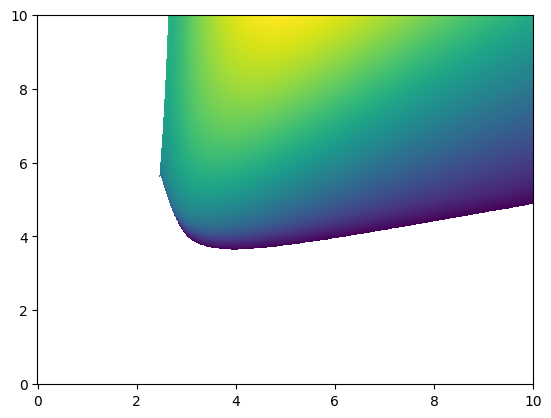

In [3]:
plt.pcolormesh(K_,m_,RPl_us)

In [6]:
N = 5000
seed = 1
theta,omega,_ = Q_Normal(N,0,1,seed=seed)
Y = np.r_[theta,theta]

In [12]:
r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd = get_r(7,7,Y,omega,N)

In [58]:
ms = np.arange(0,10.01,0.1)
seeds_arr =np.arange(1,97,1)

In [156]:
N = 10000
seed_set = []
import multiprocessing
N_cpu = multiprocessing.cpu_count()
print(N_cpu)
for i in range(len(seeds_arr[::N_cpu])):
    try:
        seed_set.append(seeds_arr[N_cpu*i:N_cpu*i+N_cpu])
    except:
        seed_set.append(seeds_arr[N_cpu*i:])


16


In [157]:
K = 7
N_R0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Rs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ps = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ms = np.nan*np.ones((len(seeds_arr),len(ms)))
N_rstd = np.nan*np.ones((len(seeds_arr),len(ms)))

In [61]:
for m_num,m in enumerate(tqdm(ms)):
    for seed_num,seeds in enumerate(seed_set):
        @parfor(seeds,(m,),bar=False)
        def get_r_seed(seed,m):
            theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
            Y = np.r_[theta_random,theta_random]
            r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd = get_r(K,m,Y,omega,N)
            return r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd 
        r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd  = zip(*get_r_seed)
        try:
            N_R0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = r0
            N_Rs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rs
            N_RPs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rp
            N_RMs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rm
            N_RPLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rpl
            N_RMLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rml
            N_0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = N0    
            N_Ps[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NP
            N_Ms[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NM
            N_rstd[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rstd
        except:
            N_R0s[N_cpu*seed_num:,m_num] = r0
            N_Rs[N_cpu*seed_num:,m_num] = rs
            N_RPs[N_cpu*seed_num:,m_num] = rp
            N_RMs[N_cpu*seed_num:,m_num] = rm
            N_RPLs[N_cpu*seed_num:,m_num] = rpl
            N_RMLs[N_cpu*seed_num:,m_num] = rml
            N_0s[N_cpu*seed_num:,m_num] = N0    
            N_Ps[N_cpu*seed_num:,m_num] = NP
            N_Ms[N_cpu*seed_num:,m_num] = NM
            N_rstd[N_cpu*seed_num:,m_num] = rstd
np.savez(f'RS_ensembles{len(seeds_arr)}_{N}_K{K}.npz',N_R0s=N_R0s,N_Rs=N_Rs,N_RPs=N_RPs,N_RMs=N_RMs,N_RPLs=N_RPLs,N_RMLs=N_RMLs,N_0s=N_0s,N_Ps=N_Ps,N_Ms=N_Ms,N_rstd=N_rstd,seeds_arr=seeds_arr,ms=ms,N=N,K=K)

  0%|          | 0/101 [00:00<?, ?it/s]

In [158]:
K = 7

ms = np.arange(4,5.01,0.01)
seeds_arr =np.arange(1,97,1)

N_R0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Rs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ps = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ms = np.nan*np.ones((len(seeds_arr),len(ms)))
N_rstd = np.nan*np.ones((len(seeds_arr),len(ms)))

In [159]:
for m_num,m in enumerate(tqdm(ms)):
    for seed_num,seeds in enumerate(seed_set):
        @parfor(seeds,(m,),bar=False)
        def get_r_seed(seed,m):
            theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
            Y = np.r_[theta_random,theta_random]
            r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd = get_r(K,m,Y,omega,N)
            return r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd 
        r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd  = zip(*get_r_seed)
        try:
            N_R0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = r0
            N_Rs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rs
            N_RPs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rp
            N_RMs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rm
            N_RPLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rpl
            N_RMLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rml
            N_0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = N0    
            N_Ps[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NP
            N_Ms[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NM
            N_rstd[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rstd
        except:
            N_R0s[N_cpu*seed_num:,m_num] = r0
            N_Rs[N_cpu*seed_num:,m_num] = rs
            N_RPs[N_cpu*seed_num:,m_num] = rp
            N_RMs[N_cpu*seed_num:,m_num] = rm
            N_RPLs[N_cpu*seed_num:,m_num] = rpl
            N_RMLs[N_cpu*seed_num:,m_num] = rml
            N_0s[N_cpu*seed_num:,m_num] = N0    
            N_Ps[N_cpu*seed_num:,m_num] = NP
            N_Ms[N_cpu*seed_num:,m_num] = NM
            N_rstd[N_cpu*seed_num:,m_num] = rstd
np.savez(f'RS_ensembles_closer{len(seeds_arr)}_{N}_K{K}.npz',N_R0s=N_R0s,N_Rs=N_Rs,N_RPs=N_RPs,N_RMs=N_RMs,N_RPLs=N_RPLs,N_RMLs=N_RMLs,N_0s=N_0s,N_Ps=N_Ps,N_Ms=N_Ms,N_rstd=N_rstd,seeds_arr=seeds_arr,ms=ms,N=N,K=K)

  0%|          | 0/101 [00:00<?, ?it/s]

In [64]:
N = 500
seed_set = []
import multiprocessing
N_cpu = multiprocessing.cpu_count()
print(N_cpu)
for i in range(len(seeds_arr[::N_cpu])):
    try:
        seed_set.append(seeds_arr[N_cpu*i:N_cpu*i+N_cpu])
    except:
        seed_set.append(seeds_arr[N_cpu*i:])
ms = np.arange(0,10.01,0.1)
seeds_arr =np.arange(1,97,1)

K = 7
N_R0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Rs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ps = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ms = np.nan*np.ones((len(seeds_arr),len(ms)))
N_rstd = np.nan*np.ones((len(seeds_arr),len(ms)))


for m_num,m in enumerate(tqdm(ms)):
    for seed_num,seeds in enumerate(seed_set):
        @parfor(seeds,(m,),bar=False)
        def get_r_seed(seed,m):
            theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
            Y = np.r_[theta_random,theta_random]
            r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd = get_r(K,m,Y,omega,N)
            return r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd 
        r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd  = zip(*get_r_seed)
        try:
            N_R0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = r0
            N_Rs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rs
            N_RPs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rp
            N_RMs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rm
            N_RPLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rpl
            N_RMLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rml
            N_0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = N0    
            N_Ps[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NP
            N_Ms[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NM
            N_rstd[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rstd
        except:
            N_R0s[N_cpu*seed_num:,m_num] = r0
            N_Rs[N_cpu*seed_num:,m_num] = rs
            N_RPs[N_cpu*seed_num:,m_num] = rp
            N_RMs[N_cpu*seed_num:,m_num] = rm
            N_RPLs[N_cpu*seed_num:,m_num] = rpl
            N_RMLs[N_cpu*seed_num:,m_num] = rml
            N_0s[N_cpu*seed_num:,m_num] = N0    
            N_Ps[N_cpu*seed_num:,m_num] = NP
            N_Ms[N_cpu*seed_num:,m_num] = NM
            N_rstd[N_cpu*seed_num:,m_num] = rstd
np.savez(f'RS_ensembles{len(seeds_arr)}_{N}_K{K}.npz',N_R0s=N_R0s,N_Rs=N_Rs,N_RPs=N_RPs,N_RMs=N_RMs,N_RPLs=N_RPLs,N_RMLs=N_RMLs,N_0s=N_0s,N_Ps=N_Ps,N_Ms=N_Ms,N_rstd=N_rstd,seeds_arr=seeds_arr,ms=ms,N=N,K=K)


ms = np.arange(4,5.01,0.01)
seeds_arr =np.arange(1,97,1)

N_R0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Rs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ps = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ms = np.nan*np.ones((len(seeds_arr),len(ms)))
N_rstd = np.nan*np.ones((len(seeds_arr),len(ms)))


for m_num,m in enumerate(tqdm(ms)):
    for seed_num,seeds in enumerate(seed_set):
        @parfor(seeds,(m,),bar=False)
        def get_r_seed(seed,m):
            theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
            Y = np.r_[theta_random,theta_random]
            r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd = get_r(K,m,Y,omega,N)
            return r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd 
        r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd  = zip(*get_r_seed)
        try:
            N_R0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = r0
            N_Rs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rs
            N_RPs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rp
            N_RMs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rm
            N_RPLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rpl
            N_RMLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rml
            N_0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = N0    
            N_Ps[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NP
            N_Ms[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NM
            N_rstd[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rstd
        except:
            N_R0s[N_cpu*seed_num:,m_num] = r0
            N_Rs[N_cpu*seed_num:,m_num] = rs
            N_RPs[N_cpu*seed_num:,m_num] = rp
            N_RMs[N_cpu*seed_num:,m_num] = rm
            N_RPLs[N_cpu*seed_num:,m_num] = rpl
            N_RMLs[N_cpu*seed_num:,m_num] = rml
            N_0s[N_cpu*seed_num:,m_num] = N0    
            N_Ps[N_cpu*seed_num:,m_num] = NP
            N_Ms[N_cpu*seed_num:,m_num] = NM
            N_rstd[N_cpu*seed_num:,m_num] = rstd
np.savez(f'RS_ensembles_closer{len(seeds_arr)}_{N}_K{K}.npz',N_R0s=N_R0s,N_Rs=N_Rs,N_RPs=N_RPs,N_RMs=N_RMs,N_RPLs=N_RPLs,N_RMLs=N_RMLs,N_0s=N_0s,N_Ps=N_Ps,N_Ms=N_Ms,N_rstd=N_rstd,seeds_arr=seeds_arr,ms=ms,N=N,K=K)

16


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

In [ ]:
np.savez(f'RS_{seed}.npz',N_R0s=N_R0s,N_Rs=N_Rs,N_RPs=N_RPs,N_RMs=N_RMs,N_RPLs=N_RPLs,N_RMLs=N_RMLs,N_0s=N_0s,N_Ps=N_Ps,N_Ms=N_Ms,N_rstd=N_rstd)


In [162]:
DATAC500 = np.load('RS_ensembles_closer96_500_K7.npz')
DATAC1000 = np.load('RS_ensembles_closer96_1000_K7.npz')
DATAC5000 = np.load('RS_ensembles_closer98_5000_K7.npz')
DATAC10000 = np.load('RS_ensembles_closer96_10000_K7.npz')

In [169]:
DATA500 = np.load('RS_ensembles96_500_K7.npz')
DATA1000 = np.load('RS_ensembles96_1000_K7.npz')
DATA5000 = np.load('RS_ensembles98_5000_K7.npz')
DATA10000 = np.load('RS_ensembles98_10000_K7.npz')

In [146]:
import seaborn as sns

(0.0, 485.3625)

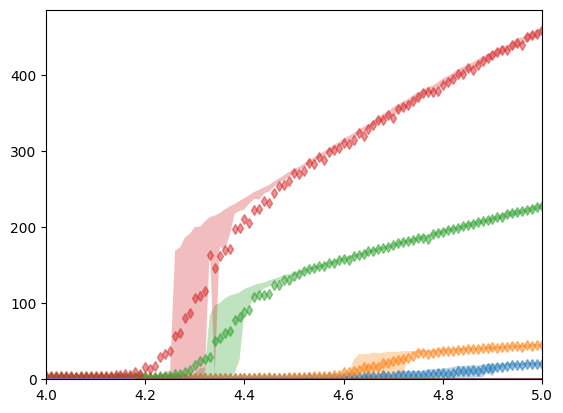

In [188]:
for DATA,N in [(DATAC500,500),(DATAC1000,1000),(DATAC5000,5000),(DATAC10000,10000)]:
    RP = DATA['N_Ps']
    RP_mean = RP.mean(axis=0)
    RP_std = RP.std(axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    plt.plot(DATA['ms'],RP_mean,'d',alpha=0.5,markersize=5)
    plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.3)

plt.plot(m_,Rd[:,700])
plt.plot(m_,RPl_us[:,700])
plt.xlim(4,5)
plt.ylim(0,)


(0.0, 0.0454059075794042)

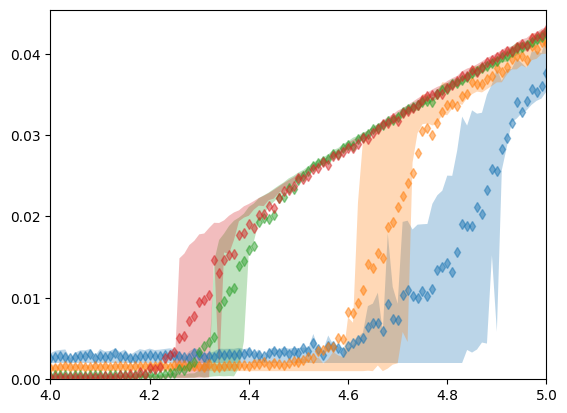

In [189]:
for DATA in [DATAC500,DATAC1000,DATAC5000,DATAC10000]:
    RP = DATA['N_RPLs']
    RP_mean = RP.mean(axis=0)
    RP_std = RP.std(axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    plt.plot(DATA['ms'],RP_mean,'d',alpha=0.5,markersize=5)
    plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.3)

# plt.plot(m_,Rd[:,700])
# plt.plot(m_,RPl_us[:,700])
plt.xlim(4,5)
plt.ylim(0,)


(0.0, 0.05)

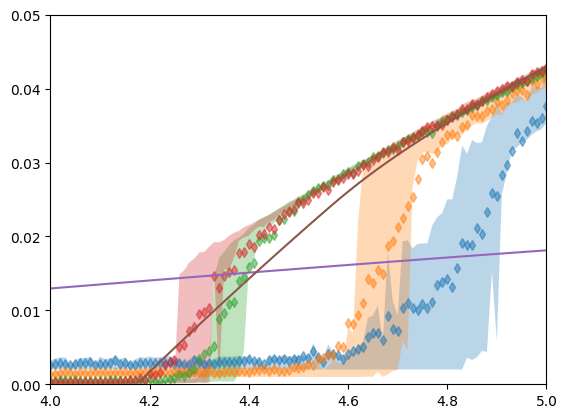

In [182]:
for DATA in [DATAC500,DATAC1000,DATAC5000,DATAC10000]:
    RP = DATA['N_RPLs']
    RP_mean = RP.mean(axis=0)
    RP_std = RP.std(axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    plt.plot(DATA['ms'],RP_mean,'d',alpha=0.5,markersize=5)
    plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.3)

plt.plot(m_,Rd[:,700])
plt.plot(m_,RPl_us[:,700])
plt.xlim(4,5)
plt.ylim(0,0.05)


0.0
0.0
0.0


(0.0, 6.0)

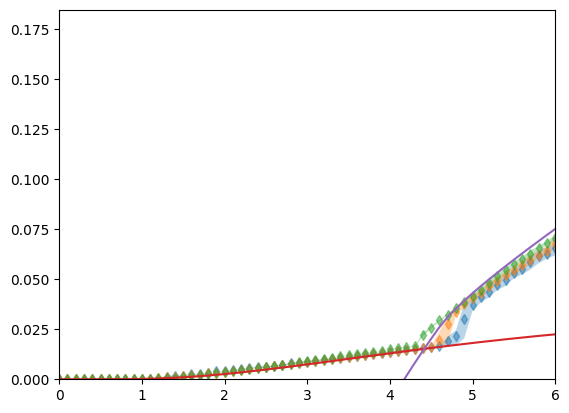

In [195]:
for DATA in [DATA500,DATA1000,DATA5000]:
# for DATA in [DATA10000]:
    RP = DATA['N_RPs']
    RP_mean = RP.mean(axis=0)
    RP_std = RP.std(axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    print(DATA['ms'].min())
    plt.plot(DATA['ms'],RP_mean,'d',alpha=0.5,markersize=5)
    plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.3)

plt.plot(m_,Rd[:,700])
plt.plot(m_,RPl_us[:,700])
# plt.xlim(4,5)
plt.ylim(0,)
plt.xlim(0,6)

(0.0, 0.18452858432301567)

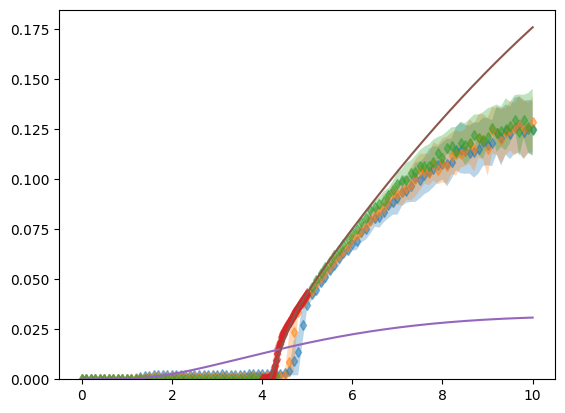

In [ ]:
for DATA in [DATA500,DATA1000,DATA5000,DATA10000]:
# for DATA in [DATA10000]:
    RP = DATA['N_RPLs']
    RP_mean = RP.mean(axis=0)
    RP_std = RP.std(axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    plt.plot(DATA['ms'],RP_mean,'d',alpha=0.5,markersize=5)
    plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.3)

plt.plot(m_,Rd[:,700])
plt.plot(m_,RPl_us[:,700])
# plt.xlim(4,5)
plt.ylim(0,)


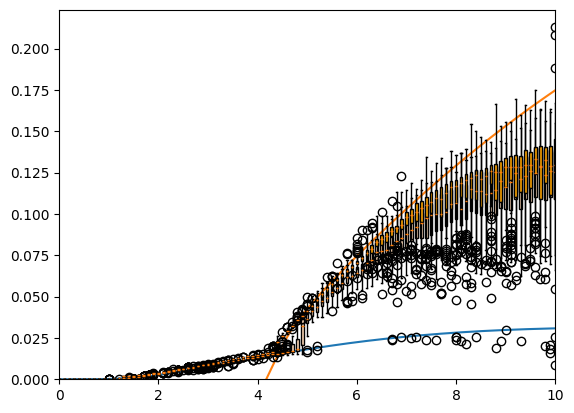

In [196]:
Rd = (R_0us - R_us)/2
plt.plot(m_,Rd[:,700])
plt.plot(m_,RP_us[:,700])

bplot = plt.boxplot(DATA500['N_RPs'],positions=DATA500['ms'],widths=0.05,patch_artist=True)
for patch in bplot['boxes']:
    patch.set_facecolor('peachpuff')
bplot = plt.boxplot(DATA5000['N_RPs'],positions=DATA5000['ms'],widths=0.05,patch_artist=True)
for patch in bplot['boxes']:
    patch.set_facecolor('orange')
plt.ylim(0,)
plt.ylim(0,)
plt.xlim(0,10)
plt.gca().set_xticks([0,2,4,6,8,10],labels=[0,2,4,6,8,10])

# plt.xlim(4,5)

(4.0, 5.0)

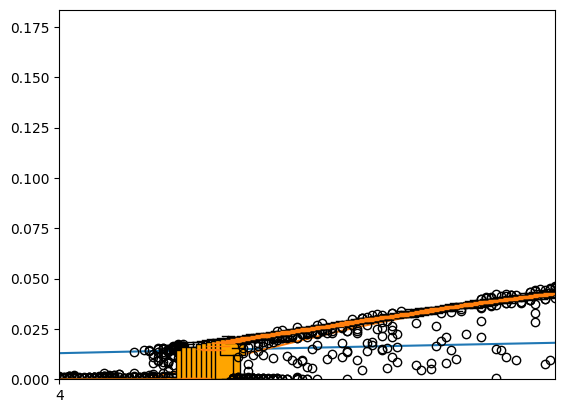

In [193]:
Rd = (R_0us - R_us)/2
plt.plot(m_,Rd[:,700])
plt.plot(m_,RP_us[:,700])

bplot = plt.boxplot(DATA10000['N_RPLs'],positions=DATA10000['ms'],widths=0.05,patch_artist=True)
for patch in bplot['boxes']:
    patch.set_facecolor('orange')
plt.ylim(0,)
plt.ylim(0,)
plt.xlim(0,10)
plt.gca().set_xticks([0,2,4,6,8,10],labels=[0,2,4,6,8,10])

plt.xlim(4,5)

In [ ]:
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
